In [26]:
# import the normal packages
import pandas as pd
import nflfastpy as nfl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# additional stuff that will help us later on
import requests

In [3]:
import os
import urllib.request

In [4]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [5]:
df = nfl.load_pbp_data(2021)
df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50177,3546,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50178,3563,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,0.444560,NaN,NaN,NaN,NaN,NaN,0.599282,-59.928155
50179,3584,2021_20_SF_GB,2022012202,GB,SF,POST,20,NaN,NaN,NaN,...,0,1,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50180,3601,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,0.711415,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#To get early down run rate
#get all plays that are 1st and 2nd down
#group by team
#count all of these current rows
#create a new variable of sum of each teams rush counts over total column counts (Called early down rush %)

In [7]:
df_early = df.loc[(df['down']==1)|(df['down']==2)]

In [8]:
df_early['play'] = 1
df_early

/var/folders/0p/1_l8qlts6zlf1414_kt1f9lm0000gn/T/ipykernel_33809/190260617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_early['play'] = 1


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
2,55,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0,1,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
6,152,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,2.692890,0.567838,7.420427,4.0,1.000000,1.000000,0.458989,54.101130
7,181,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-1.009908,NaN,NaN,NaN,NaN,NaN,0.419833,-41.983327
8,218,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,ARI,away,TEN,...,1,1,-0.511090,1.036891,10.339405,9.0,0.478471,0.079696,0.684949,31.505138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50169,3387,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,1.034972,0.281189,4.687132,3.0,0.998326,0.983039,0.783291,21.670932
50170,3411,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,-0.427328,NaN,NaN,NaN,NaN,NaN,0.669945,-66.994542
50172,3449,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,-1.310547,NaN,NaN,NaN,NaN,NaN,0.759290,-75.929022
50176,3525,2021_20_SF_GB,2022012202,GB,SF,POST,20,SF,away,GB,...,0,1,-0.038293,NaN,NaN,NaN,NaN,NaN,0.635728,-63.572812


In [9]:
#df_run = df.loc[(df['rush'] == 1)]
df_run = df_early[['posteam', 'down','rusher_player_name', 'rusher_player_id', 'rushing_yards', 'rush', 'play']]

In [10]:
df = df_run.groupby(['posteam'], as_index=False).agg({'rush': ['sum'],'play':['sum']})
df['rate'] = df['rush']/df['play']
df = df.round(2)

In [11]:
df2 = nfl.load_pbp_data(2021)

In [12]:
df2 = df2.groupby('posteam')[['epa']].mean().sort_values(by='epa', ascending=False)

In [13]:
df3 = df2.merge(df[['posteam','rush','play', 'rate']], on='posteam')


/Users/moore_austin02/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(
/Users/moore_austin02/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [14]:
df3 = df3.rename(columns={'(rush,sum)':'rushes', '(play,sum)':'plays', '(rate,)':'rush_rate' })

In [15]:
df3.columns = ['posteam','epa', 'rushes', 'plays', 'rush_rate']

In [16]:
logos = pd.read_csv('Teams.csv')

In [17]:
logos = pd.read_csv('Teams.csv')
df3 = df3.merge(logos[['team_logo_espn', 'team_abbr']].rename(columns={'team_abbr': 'posteam'}), on='posteam')

/var/folders/0p/1_l8qlts6zlf1414_kt1f9lm0000gn/T/ipykernel_33809/4257431975.py:5: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  return OffsetImage(plt.imread(path), zoom=zoom)


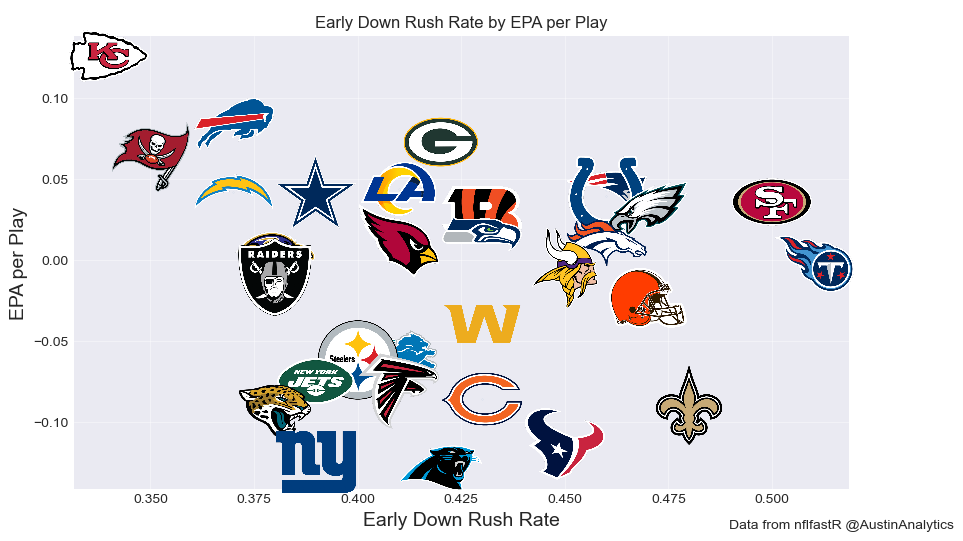

In [52]:
x = df3.rush_rate
y = df3.epa

def getImage(path, zoom=.12):
    return OffsetImage(plt.imread(path), zoom=zoom)

paths = df3['team_logo_espn']

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y,s=.001) 
plt.style.use('seaborn-dark')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
#Adding labels and text\
ax.set_title('Early Down Rush Rate by EPA per Play')
ax.set_xlabel('Early Down Rush Rate', fontsize=14)
ax.set_ylabel('EPA per Play', fontsize=14)
plt.figtext(.78, .06, 'Data from nflfastR @AustinAnalytics', fontsize=10)
plt.savefig('Early Down Run Rate by EPA per Play5.png')

In [36]:
df_run = df_early[['posteam', 'down', 'week', 'rush', 'play', 'epa']]

In [41]:
df = df_run.groupby(['posteam', 'week'], as_index=False).agg({'rush': ['sum'],'play':['sum'], 'epa':['mean']})
df['rate'] = df['rush']/df['play']
df = df.round(2)
df = df[df.posteam =='CIN']
df.columns = ['posteam', 'week', 'rushes', 'plays', 'epa', 'rush_rate']

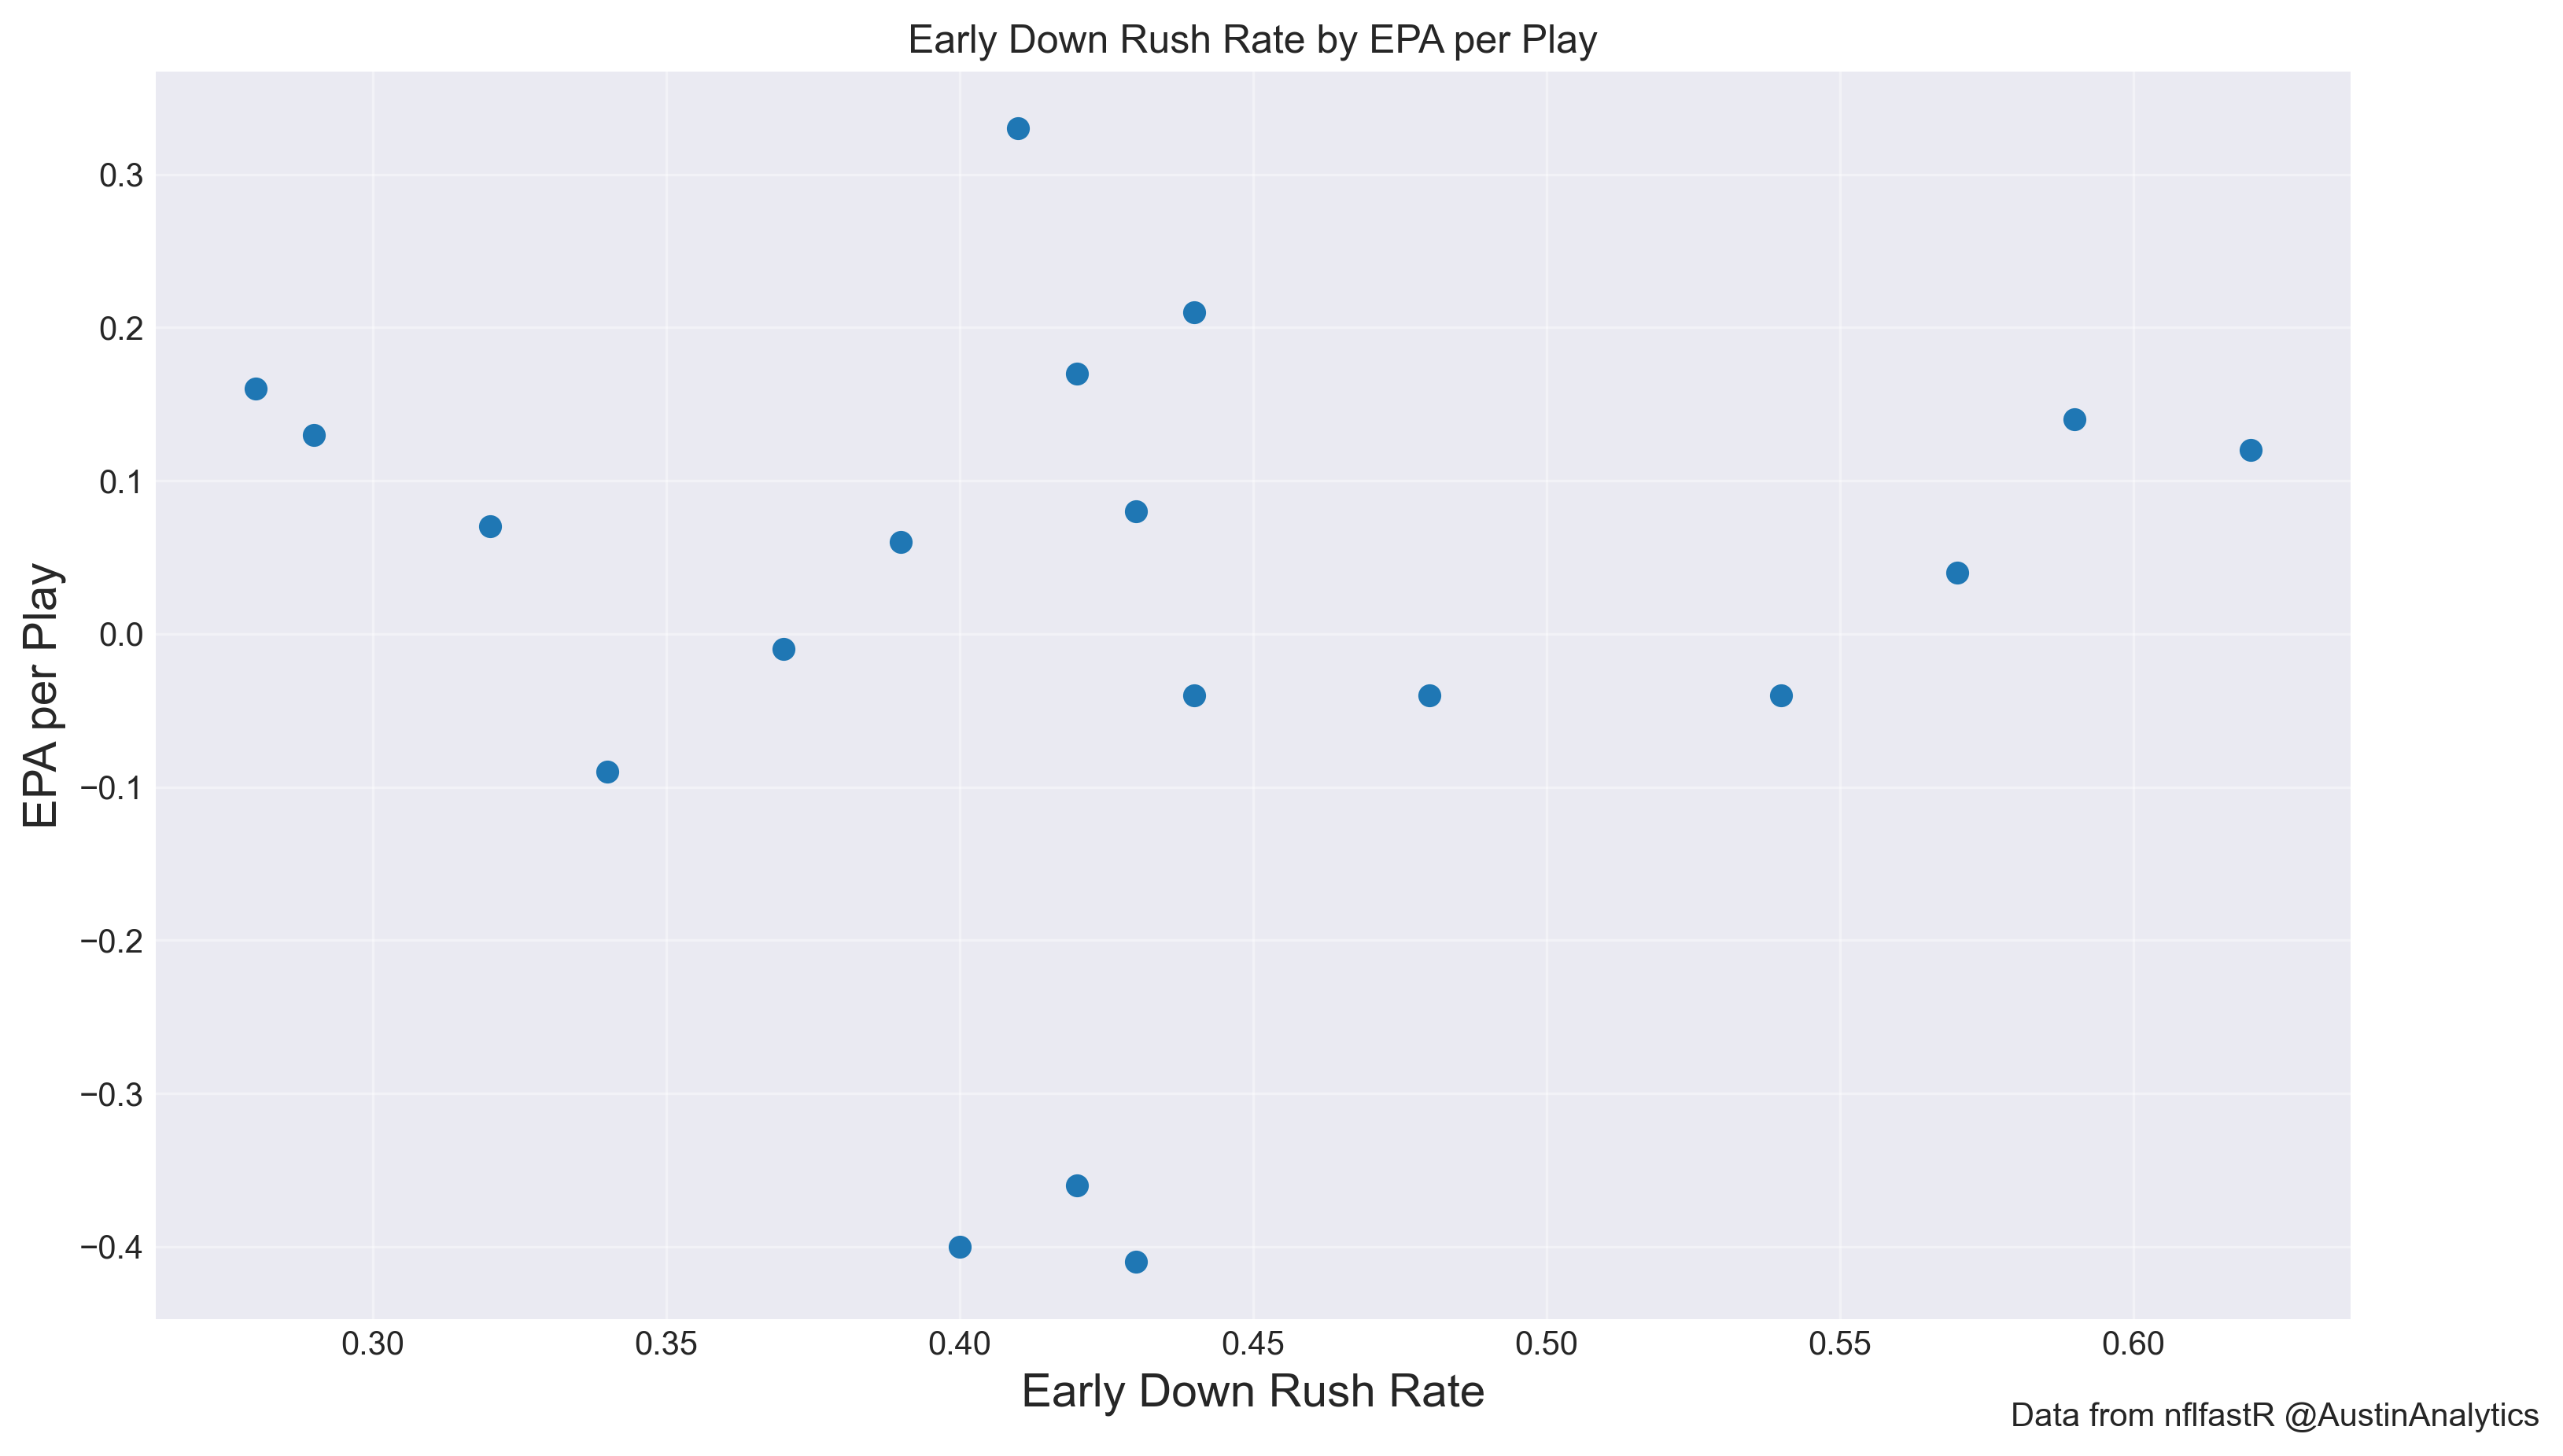

In [45]:
x = df.rush_rate
y = df.epa

fig, ax = plt.subplots(figsize = (12,7))
ax.scatter(x, y) 
plt.style.use('seaborn-dark')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
#Adding labels and text\
ax.set_title('Early Down Rush Rate by EPA per Play')
ax.set_xlabel('Early Down Rush Rate', fontsize=14)
ax.set_ylabel('EPA per Play', fontsize=14)
plt.figtext(.78, .06, 'Data from nflfastR @AustinAnalytics', fontsize=10)
plt.savefig('Early Down Run Rate by EPA per Play4.png')